## Načteme si potřebné knihovny

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import plotly.graph_objects as gp

pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Načtení dat do DataFrame

Ze souboru `spotify-2023.csv` umístěném ve stejném adresáři načteme data a vytvoříme Pandas DataFrame.


In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="utf-8", encoding_errors="ignore")
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

## Zkoumání jednotlivých atributů datové sady

In [3]:
# Zkoumáme datový typ jednotlivých sloupců
data_types = df.dtypes
data_types
# df.info()

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Z výpisu typů jednotlivých atributů vidíme, že `streams`, `in_deezer_playlists` a `in_shazam_charts` jsou typu object. Tyto atributy bychom chtěli převést na číslo

In [4]:
df['streams'] = pd.to_numeric(df['streams'].replace({',': ''}, regex=True), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].replace({',': ''}, regex=True), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].replace({',': ''}, regex=True), errors='coerce')

data_types = df.dtypes
data_types

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [5]:
# Zkoumáme počet hodnot v jednotlivých sloupcích
distinct_values = df.nunique()
distinct_values

track_name              942
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 948
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [6]:
# Zkoumáme nejčastější hodnoty v jednotlivých sloupcích
most_occuring_values = df.mode().iloc[0]
most_occuring_values

track_name                          
artist(s)_name          Taylor Swift
artist_count                       1
released_year                   2022
released_month                     1
released_day                       1
in_spotify_playlists              86
in_spotify_charts                  0
streams                    156338624
in_apple_playlists                 0
in_apple_charts                    0
in_deezer_playlists                0
in_deezer_charts                   0
in_shazam_charts                   0
bpm                              120
key                               C#
mode                           Major
danceability_%                    70
valence_%                         24
energy_%                          74
acousticness_%                     0
instrumentalness_%                 0
liveness_%                        11
speechiness_%                      4
Name: 0, dtype: object

In [7]:
# Zkoumáme rozsah hodnot v jednotlivých sloupcích
value_ranges = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
value_ranges

artist_count  released_year  released_month  released_day  \
min             1           1930               1             1   
25%             1           2020               3             6   
50%             1           2022               6            13   
75%             2           2022               9            22   
max             8           2023              12            31   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
min                    31                  0       2762                   0   
25%                   875                  0  141636175                  13   
50%                  2224                  3  290530915                  34   
75%                  5542                 16  673869022                  88   
max                 52898                147 3703895074                 672   

     in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
min                0                    0                 0                 0   
25%                7                   13                 0                 0   
50%               38                   44                 0                 2   
75%               87                  164                 2                37   
max              275                12367                58              1451   

     bpm  danceability_%  valence_%  energy_%  acousticness_%  \
min   65              23          4         9               0   
25%  100              57         32        53               6   
50%  121              69         51        66              18   
75%  140              78         70        77              43   
max  206              96         97        97              97   

     instrumentalness_%  liveness_%  speechiness_%  
min                   0           3              2  
25%                   0          10              4  
50%                   0          12              6  
75%                   0          24             11  
max                  91          97             64

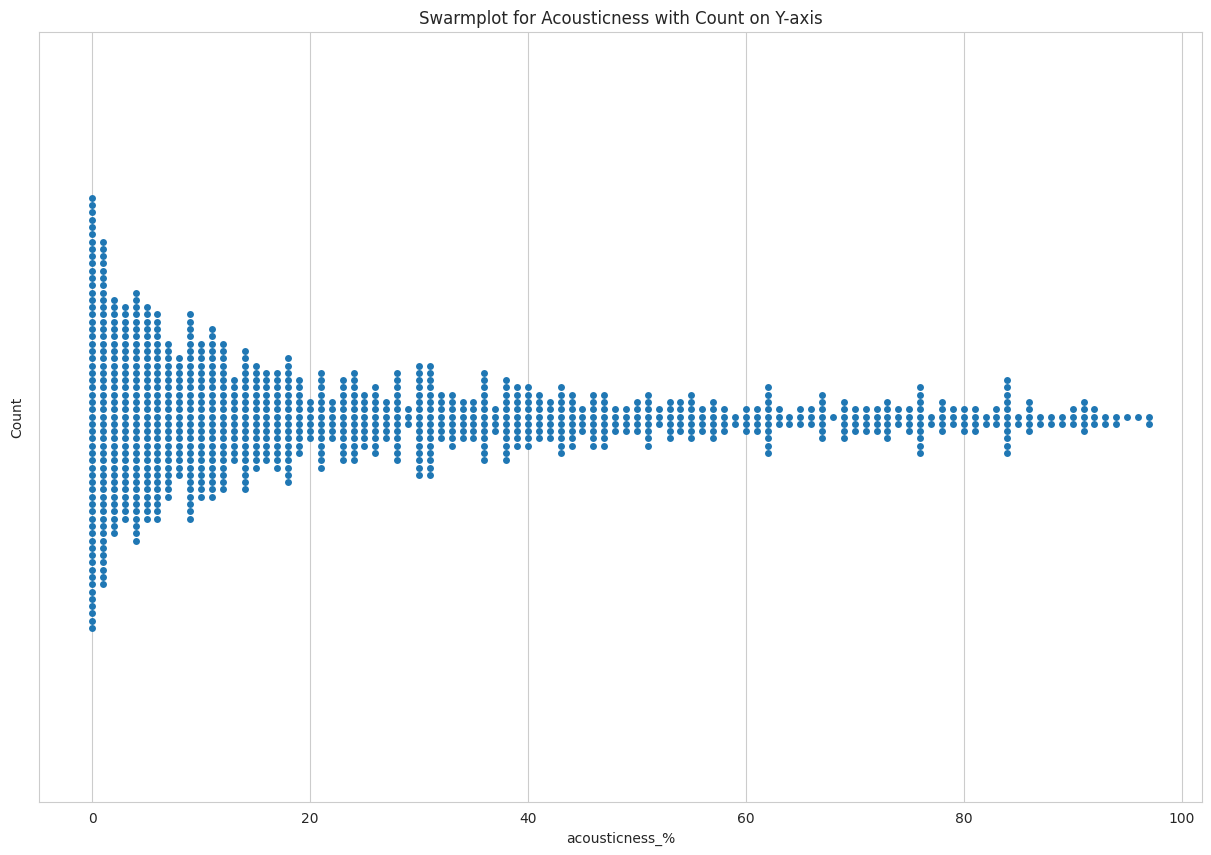

In [8]:
x_attribute = 'acousticness_%'

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.swarmplot(x=x_attribute, data=df)
plt.title(f'Swarmplot for Acousticness with Count on Y-axis')
plt.xlabel(x_attribute)
plt.ylabel('Count')
plt.show()

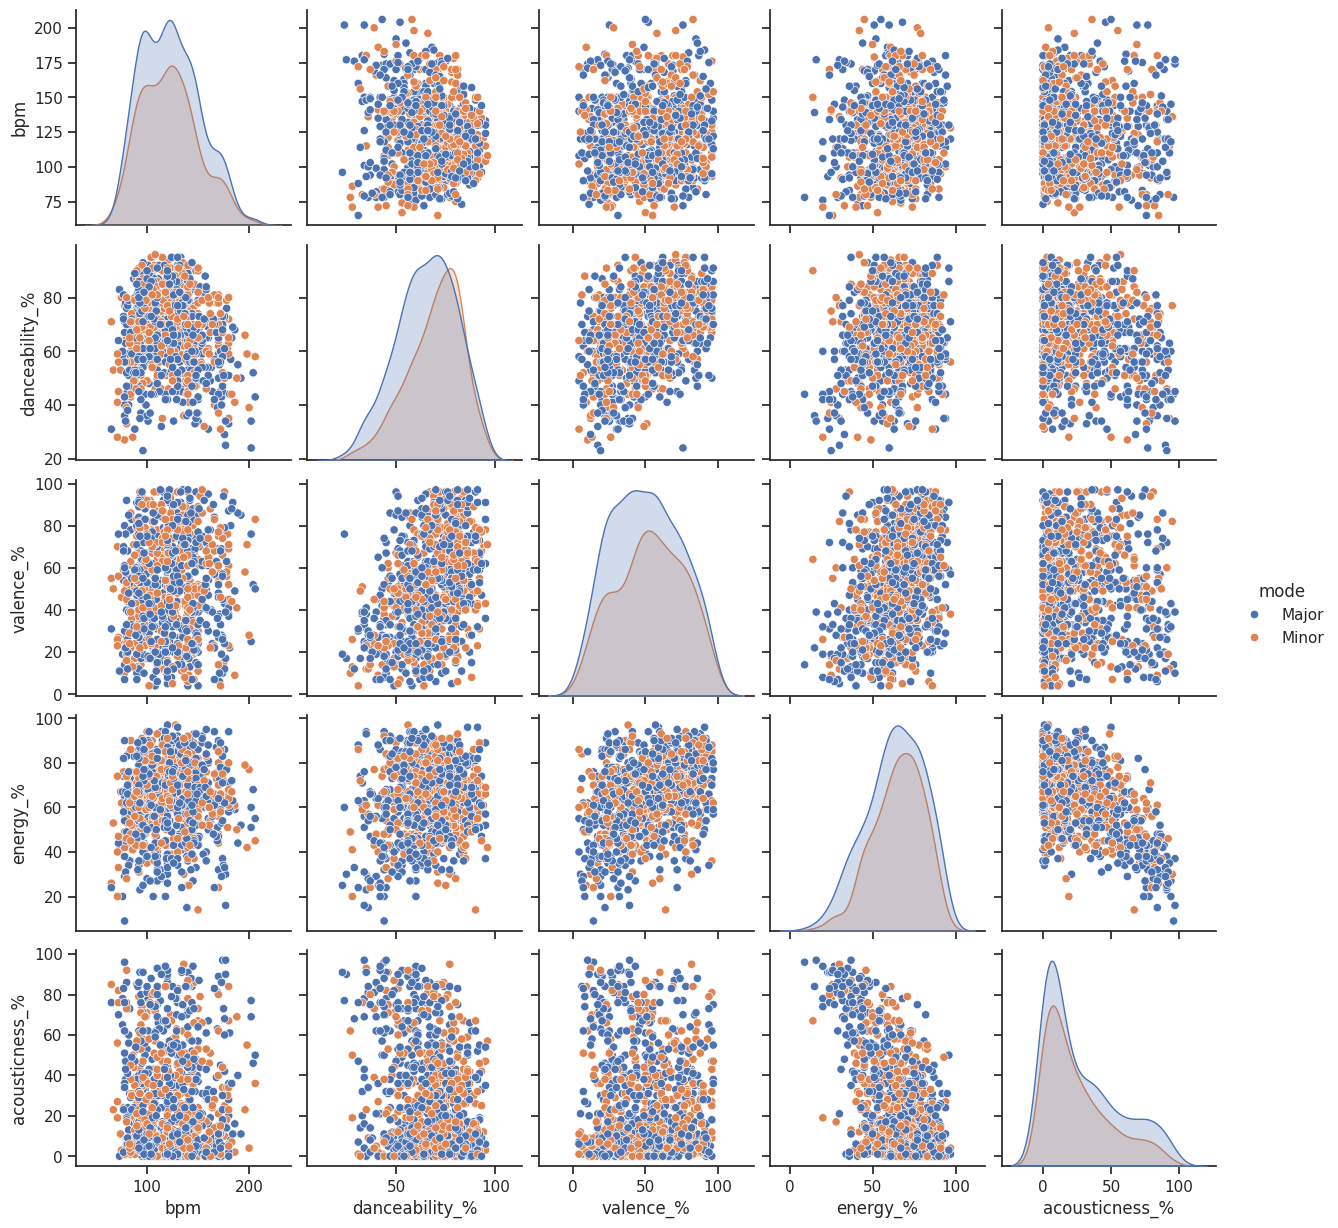

In [9]:
numerical_attributes = ['bpm', 'danceability_%','valence_%', 'energy_%', 'acousticness_%']

sns.set(style="ticks")
sns.pairplot(df[numerical_attributes + ['mode']], hue="mode")
plt.show()

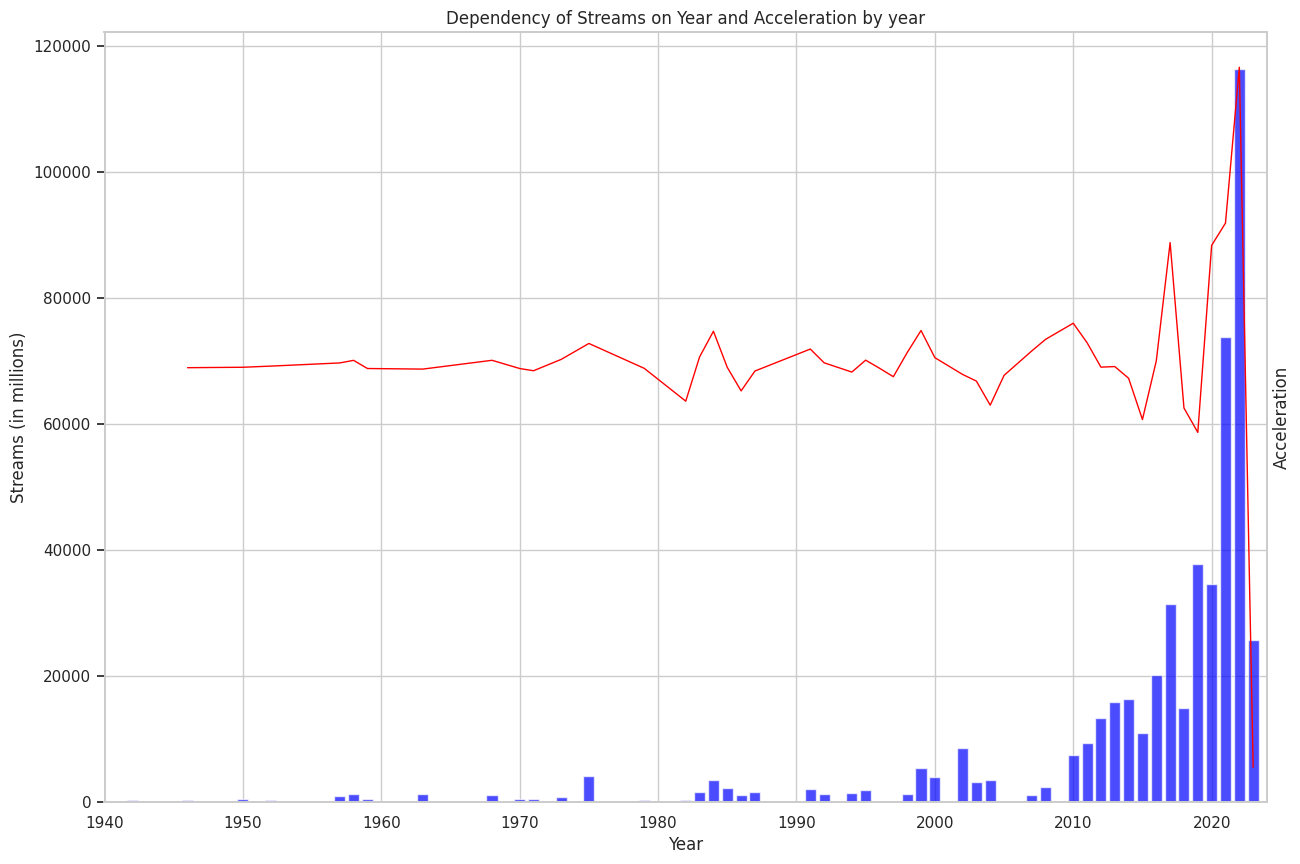

In [10]:
# Group by released year and calculate the sum of streams
df_grouped = df.groupby(['released_year'])['streams'].sum().reset_index()

window_size = 1 # You can adjust this value based on your preference
#y_smoothed = df_grouped['streams'].rolling(window=window_size, center=True).mean()
y_smoothed = df_grouped['streams'].rolling(window=window_size, center=False).mean()


# Calculate the second derivative (acceleration) of smoothed streams with respect to year
y_acceleration = np.gradient(np.gradient(y_smoothed))

plt.figure(figsize=(15, 10))

sns.set_style('whitegrid')

# # Plot for Streams
plt.bar(df_grouped['released_year'], df_grouped['streams']/10**6, color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Streams (in millions)')

# Create a secondary y-axis for acceleration
ax2 = plt.gca().twinx()
ax2.plot(df_grouped['released_year'][2:], y_acceleration[0:-2], color='red', label='Acceleration', linewidth=1, alpha=1)
ax2.set_ylabel('Acceleration')
ax2.set_yticks([])

ax2.grid(False)

# Combine legends for both plots
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.xlim(1940, 2024)
plt.title('Dependency of Streams on Year and Acceleration by year')
plt.show()

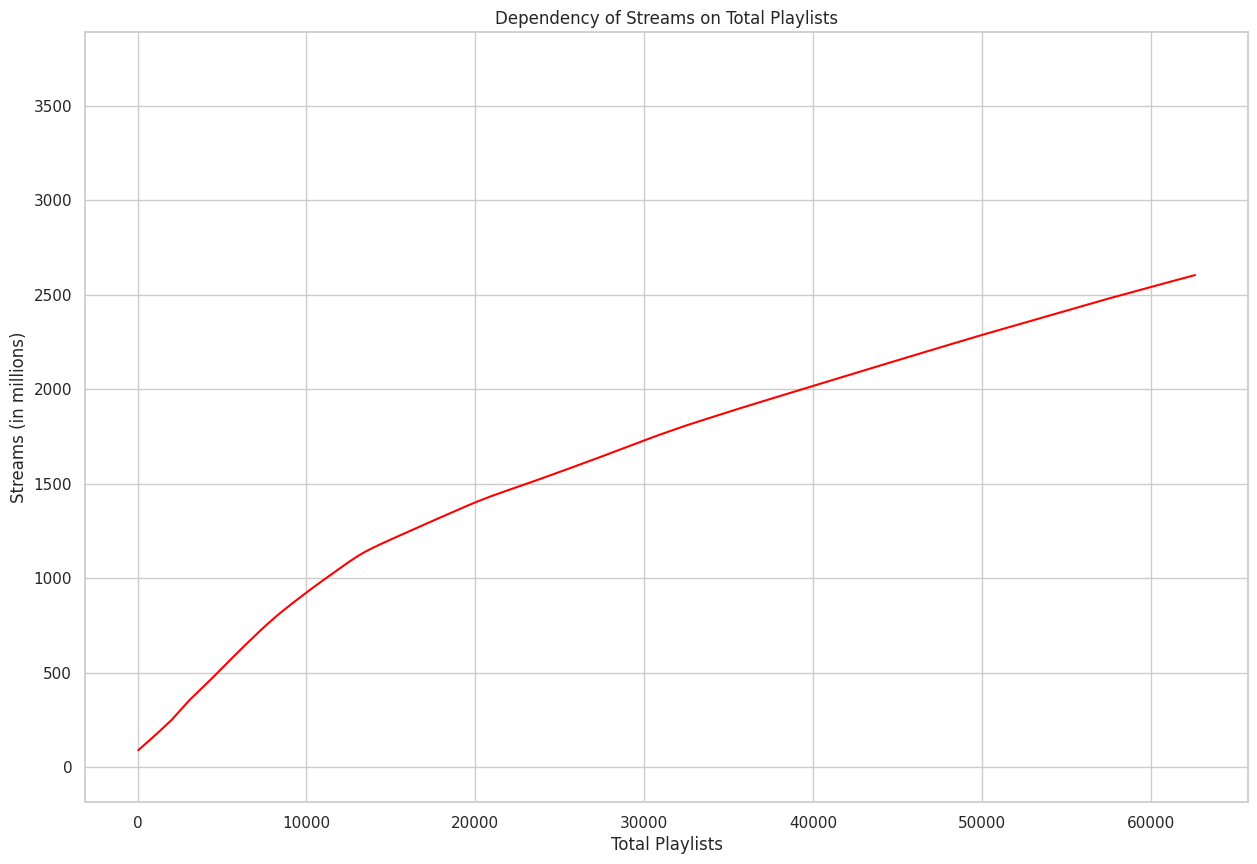

In [11]:
df['played'] = df['in_spotify_playlists'] + df['in_deezer_playlists'] + df['in_apple_playlists']

df['streams_millions'] = df['streams']/10**6

plt.figure(figsize=(15, 10))

sns.set(style="whitegrid")

sns.scatterplot(x='played', y='streams_millions', data=df, alpha=0.7, marker='')

lowess = sm.nonparametric.lowess
smoothed = lowess(df['streams_millions'], df['played'])
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Local Regression')

plt.xlabel('Total Playlists')
plt.ylabel('Streams (in millions)')
plt.title('Dependency of Streams on Total Playlists')

plt.show()

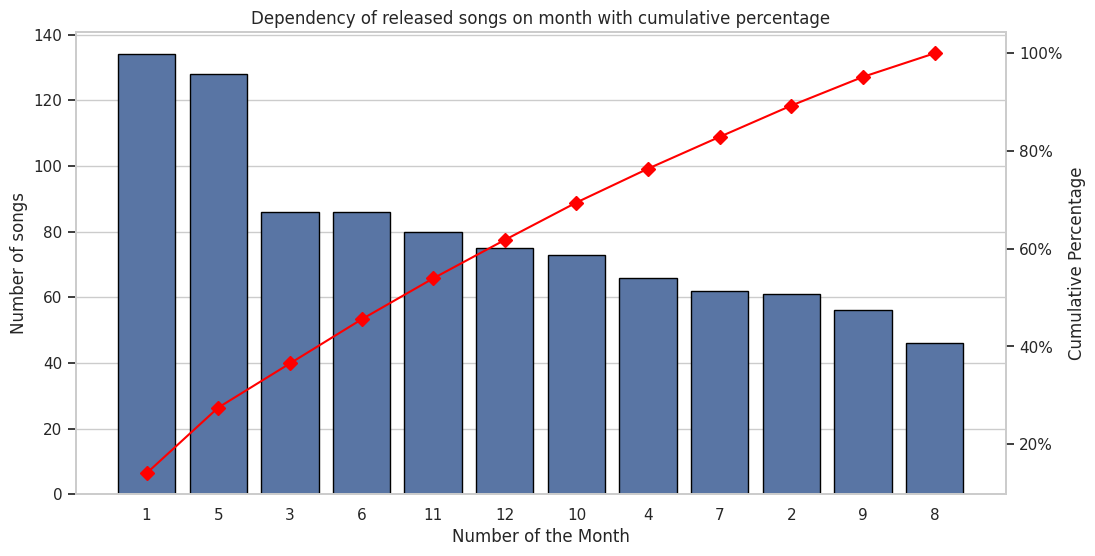

In [12]:
monthly_songs = df['released_month'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='num_songs', ascending=False)

month_order = monthly_songs['released_month'].tolist()
df.loc[:, 'released_month_cat'] = pd.Categorical(df['released_month'], categories=month_order, ordered=True)

monthly_songs = df['released_month_cat'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='released_month')

monthly_songs["cum_percentage"] = round(monthly_songs["num_songs"].cumsum()/monthly_songs["num_songs"].sum()*100,2)

fig, ax = plt.subplots(figsize=(12,6))
sns.set(style="whitegrid")

# Plot bars (i.e. frequencies)
sns.barplot(x='released_month', y='num_songs', data=monthly_songs, edgecolor='black')

ax.set_title("Dependency of released songs on month with cumulative percentage")
ax.set_xlabel("Number of the Month")
ax.set_ylabel("Number of songs")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(range(0,12), monthly_songs['cum_percentage'], color="red", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

ax2.grid(False)

plt.show()

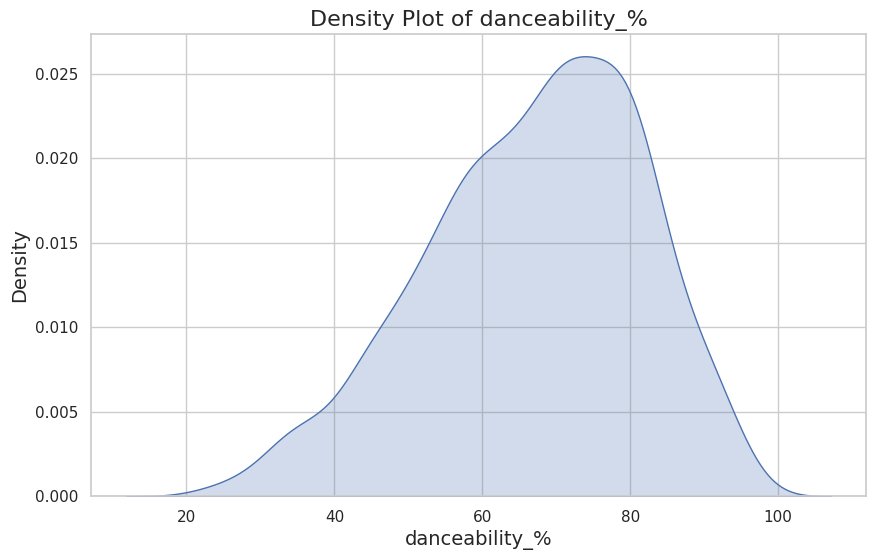

In [13]:
attribute_name = 'danceability_%'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn's kdeplot to create a density plot
sns.kdeplot(data=df[attribute_name], fill=True, ax=ax)

# Set the title and labels
ax.set_title(f'Density Plot of {attribute_name}', fontsize=16)
ax.set_xlabel(attribute_name, fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Display the plot
plt.show()

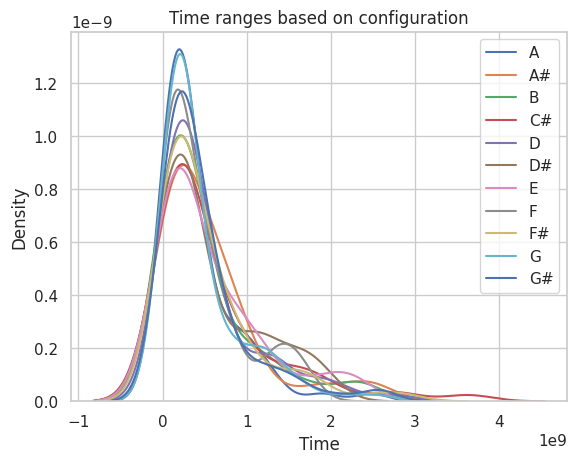

In [14]:
grouped = df.groupby("key")["streams"]

for mode, streams in grouped:
    sns.kdeplot(streams, label=mode)
    
plt.legend()
plt.title("Time ranges based on configuration")
plt.xlabel("Time")
plt.show()


In [15]:
percentage_ranges = np.arange(0, 101, 10)

df['acousticness_range'] = pd.cut(df['acousticness_%'], bins=percentage_ranges, include_lowest=True, right=False)

# Změníme formát
df['acousticness_range'] = df['acousticness_range'].apply(lambda x: f'{int(x.left)}-{int(x.right)}')

total_songs = len(df)

# Spočítáme procenta
grouped_df = df.groupby(['acousticness_range', 'mode'], observed=True).size().reset_index(name='song_count')
grouped_df['percentage'] = (grouped_df['song_count'] / total_songs) * 100

# Abychom nezměnili původní DataFrame
result_df = pd.pivot_table(grouped_df, values='percentage', index='acousticness_range', columns='mode', fill_value=0).reset_index()

result_df['Minor'] *= -1

# Population pyramid
fig = gp.Figure()

fig.add_trace(gp.Bar(y=result_df['acousticness_range'], x=result_df['Major'],
                     name='Major', orientation='h'))

fig.add_trace(gp.Bar(y=result_df['acousticness_range'], x=result_df['Minor'],
                     name='Minor', orientation='h'))

fig.update_layout(title='Acousticness Range based on Mode',
                  title_font_size=22, barmode='relative',
                  bargap=0.0, bargroupgap=0,
                  xaxis=dict(tickvals=[-20, -15, -10, 0, 10, 15, 20],
                             ticktext=['20', '15', '10', '0', '10', '15', '20'],
                             title='Percentage of Total Songs',
                             title_font_size=14)
                  )

df.drop(['acousticness_range'], axis=1, inplace=True)

fig.show()

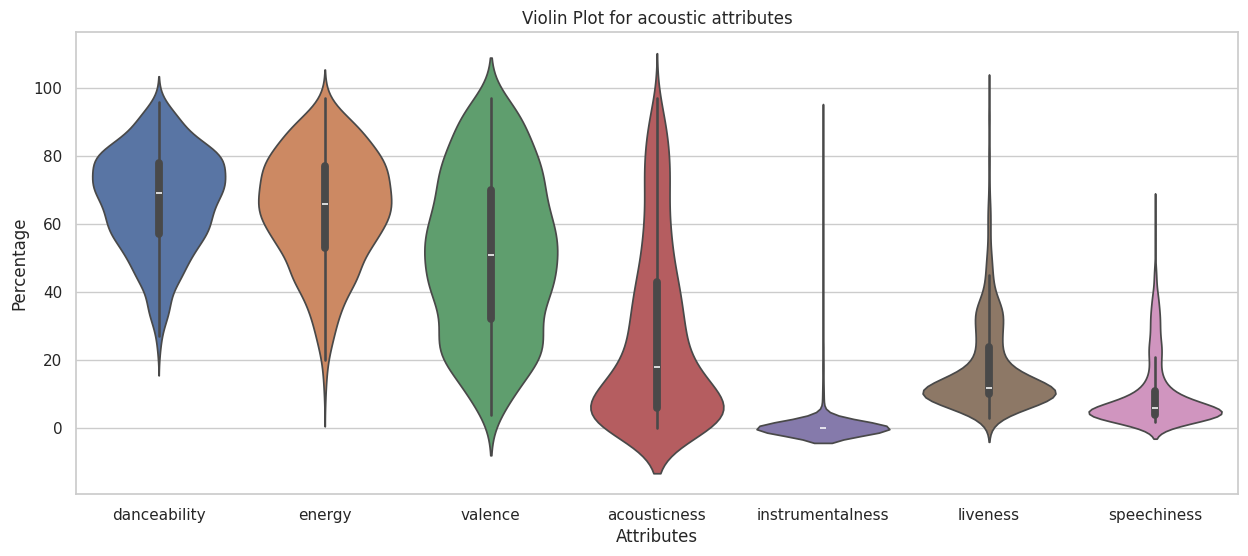

In [16]:
selected_columns = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

sns.set(style="whitegrid")

# Create a violin plot using seaborn
sns.violinplot(data=df_selected)

# Set plot labels and title
plt.title('Violin Plot for acoustic attributes')
plt.xlabel('Attributes')
plt.ylabel('Percentage')
plt.xticks([0,1,2,3,4,5,6],['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])

# Show the plot
plt.show()

### Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty

In [17]:
numerical_attributes = list(df.columns[df.dtypes != 'object'])

to_remove = ['played', 'streams_millions', 'released_month_cat']

numerical_attributes = [col for col in numerical_attributes if col not in to_remove]

Q1 = df[numerical_attributes].quantile(0.25)
Q3 = df[numerical_attributes].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[numerical_attributes] < (Q1 - 1.5 * IQR)) | (df[numerical_attributes] > (Q3 + 1.5 * IQR))).any(axis=1)

for column in numerical_attributes:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    attribute_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\nAttribute: {column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

df[outliers]


Attribute: artist_count
Lower Bound: -0.5
Upper Bound: 3.5

Attribute: released_year
Lower Bound: 2017.0
Upper Bound: 2025.0

Attribute: released_month
Lower Bound: -6.0
Upper Bound: 18.0

Attribute: released_day
Lower Bound: -18.0
Upper Bound: 46.0

Attribute: in_spotify_playlists
Lower Bound: -6125.5
Upper Bound: 12542.5

Attribute: in_spotify_charts
Lower Bound: -24.0
Upper Bound: 40.0

Attribute: streams
Lower Bound: -656713095.5
Upper Bound: 1472218292.5

Attribute: in_apple_playlists
Lower Bound: -99.5
Upper Bound: 200.5

Attribute: in_apple_charts
Lower Bound: -113.0
Upper Bound: 207.0

Attribute: in_deezer_playlists
Lower Bound: -213.5
Upper Bound: 390.5

Attribute: in_deezer_charts
Lower Bound: -3.0
Upper Bound: 5.0

Attribute: in_shazam_charts
Lower Bound: -55.5
Upper Bound: 92.5

Attribute: bpm
Lower Bound: 40.0
Upper Bound: 200.0

Attribute: danceability_%
Lower Bound: 25.5
Upper Bound: 109.5

Attribute: valence_%
Lower Bound: -25.0
Upper Bound: 127.0

Attribute: energy_%


track_name               artist(s)_name  \
0    Seven (feat. Latto) (Explicit Ver.)             Latto, Jung Kook   
1                                   LALA                  Myke Towers   
2                                vampire               Olivia Rodrigo   
3                           Cruel Summer                 Taylor Swift   
4                         WHERE SHE GOES                    Bad Bunny   
..                                   ...                          ...   
940                        Sweet Nothing                 Taylor Swift   
942                         Con La Brisa  Ludwig Goransson, Foudeqush   
945                      BackOutsideBoyz                        Drake   
946                           Broke Boys             Drake, 21 Savage   
949            Bigger Than The Whole Sky                 Taylor Swift   

     artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
1               1           2023               3            23   
2               1           2023               6            30   
3               1           2019               8            23   
4               1           2023               5            18   
..            ...            ...             ...           ...   
940             1           2022              10            21   
942             2           2022              11             4   
945             1           2022              11             4   
946             2           2022              11             4   
949             1           2022              10            21   

     in_spotify_playlists  in_spotify_charts   streams  in_apple_playlists  \
0                     553                147 141381703                  43   
1                    1474                 48 133716286                  48   
2                    1397                113 140003974                  94   
3                    7858                100 800840817                 116   
4                    3133                 50 303236322                  84   
..                    ...                ...       ...                 ...   
940                  1747                  0 186104310                   9   
942                   486                  0  71095708                   8   
945                  1045                  0  93367537                   8   
946                  1060                  0 106249219                   3   
949                  1180                  0 121871870                   4   

     ...  danceability_%  valence_%  energy_%  acousticness_%  \
0    ...              80         89        83              31   
1    ...              71         61        74               7   
2    ...              51         32        53              17   
3    ...              55         58        72              11   
4    ...              65         23        80              14   
..   ...             ...        ...       ...             ...   
940  ...              34         39        16              97   
942  ...              62         25        44              51   
945  ...              85         40        43               4   
946  ...              64         11        53               1   
949  ...              42          7        24              83   

     instrumentalness_% liveness_% speechiness_%  played  streams_millions  \
0                     0          8             4     641               141   
1                     0         10             4    1580               134   
2                     0         31             6    1582               140   
3                     0         11            15    8099               801   
4                    63         11             6    3304               303   
..                  ...        ...           ...     ...               ...   
940                   0         12             5    1769               186   
942               

In [18]:
# zero playlists
df.drop(['released_month_cat'], axis=1, inplace=True)
df.drop(['played'], axis=1, inplace=True)
df.drop(['streams_millions'], axis=1, inplace=True)

playlists = ['in_deezer_playlists', 'in_apple_playlists']

df[df[playlists].eq(0).any(axis=1)]

track_name  \
29      Dance The Night (From Barbie The Album)   
53                 (It Goes Like) Nanana - Edit   
93                                   Don���t Bl   
111                           Tak Segampang Itu   
154                        Locked Out Of Heaven   
169                         When I Was Your Man   
170                          Let Me Down Slowly   
185                                     Cheques   
265   Cupid ��� Twin Ver. (FIFTY FIFTY) ��� Spe   
272           Princess Diana (with Nicki Minaj)   
280     Watch This - ARIZONATEARS Pluggnb Remix   
327  Peaches (from The Super Mario Bros. Movie)   
336                                 Ain���t Tha   
337                                Thinkin��� B   
339                           Everything I Love   
342                                        Sial   
343                            I Wrote The Book   
344               Apna Bana Le (From "Bhediya")   
355                                   98 Braves   
372                             About Damn Time   
373                 Born With A Beer In My Hand   
378                                 My Universe   
379                                Devil Don���   
425                                    Dream On   
474                                   Notice Me   
493                                    Too Late   
541                            A Tale By Quincy   
552                   Every Angel is Terrifying   
627                                         Bar   
628                      The Rumbling (TV Size)   
642                                    Se Le Ve   
703                          Hati-Hati di Jalan   
706                 Yo Voy (feat. Daddy Yankee)   
713                       Thinking with My Dick   
797                            Rich - Interlude   
807                          Savior - Interlude   
835                                 Born Singer   
853                   Nos Comemos (feat. Ozuna)   
859                                         295   
860                              Tak Ingin Usai   
914                                     Selfish   
927         I Really Want to Stay at Your House   
930                         Casei Com a Putaria   

                                        artist(s)_name  artist_count  \
29                                            Dua Lipa             1   
53                                           Peggy Gou             1   
93                                        Taylor Swift             1   
111                                       Anggi Marito             1   
154                                         Bruno Mars             1   
169                                         Bruno Mars             1   
170                                      Alec Benjamin             1   
185                                              Shubh             1   
265                                       sped up 8282             1   
272                             Nicki Minaj, Ice Spice             2   
280      sped up nightcore, ARIZONATEARS, Lil Uzi Vert             3   
327                                         Jack Black             1   
336                                      Morgan Wallen             1   
337                                      Morgan Wallen             1   
339                                      Morgan Wallen             1   
342                                           Mahalini             1   
343                                      Morgan Wallen             1   
344                         Arijit Singh, Sachin-Jigar             2   
355                                      Morgan Wallen             1   
372                                              Lizzo             1   
373                                      Morgan Wallen             1   
378                                      Coldplay, BTS             2   
379                                      Morgan Wallen             1   
425                                          Aerosmith          

In [19]:
duplicates = df[df.duplicated(subset=['track_name', 'artist(s)_name'])]
print(f"Number of duplicate songs: {len(duplicates)}")
duplicates

Number of duplicate songs: 4


track_name artist(s)_name  artist_count  released_year  \
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
482              10            31                   573                  0   
616               8             6                  6392                  0   
764               4            14                  9021                  0   
873               3            19                  1818                  0   

      streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
482 301869854                   1  ...  166   C#  Major              70   
616 432702334                 174  ...  121   G#  Major              75   
764 723894473                 242  ...  109   A#  Minor              84   
873 711366595                   3  ...  170  NaN  Major              56   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
482         57       57              9                  20          11   
616         53       74              2                   0          11   
764         72       74             10                   0          34   
873         52       64             11                   0          45   

     speechiness_%  
482              7  
616              5  
764              7  
873              7  

[4 rows x 24 columns]

In [20]:
# artist name contains ','
df[df['artist(s)_name'].str.contains('The Creator')]

track_name  \
43                              See You Again   
302                                  DOGTOOTH   
304                           SORRY NOT SORRY   
514  Here We Go��� Again (feat. Tyler, the Cr   
694                            NEW MAGIC WAND   
833                          Cash In Cash Out   

                                       artist(s)_name  artist_count  \
43                     Tyler, The Creator, Kali Uchis             3   
302                                Tyler, The Creator             2   
304                                Tyler, The Creator             2   
514                    The Weeknd, Tyler, The Creator             3   
694                                Tyler, The Creator             2   
833  Pharrell Williams, Tyler, The Creator, 21 Savage             4   

     released_year  released_month  released_day  in_spotify_playlists  \
43            2017               7            21                 13387   
302           2023               3            27                  1479   
304           2023               3            31                   709   
514           2022               1             7                  1420   
694           2019               5            16                  4708   
833           2022               6            10                  2313   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
43                  64 1047101291                  77  ...   79   F#  Major   
302                  0   80758350                  23  ...   78   G#  Major   
304                  0   58473276                   8  ...   96   F#  Minor   
514                  0   88103848                   7  ...  135   C#  Major   
694                  0  461437791                  13  ...  140    F  Minor   
833                  0  136676504                  34  ...  120    G  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
43               56         58       56             37                   0   
302              71         80       65             51                   0   
304              48         50       80             40                   0   
514              41         27       64             36                   0   
694              62         46       73             10                   0   
833              88         15       56              1                   0   

     liveness_%  speechiness_%  
43           11             10  
302          22             32  
304          37             20  
514          60              3  
694          67             11  
833           8              6  

[6 rows x 24 columns]

In [21]:
acoustics = ['danceability_%', 'valence_%', 'energy_%',	'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df[df[acoustics].eq(0).any(axis=1)]

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
5                               Sprinter   Dave, Central Cee             2   
..                                   ...                 ...           ...   
947                        The Great War        Taylor Swift             1   
948                         My Mind & Me        Selena Gomez             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
5             2023               6             1                  2186   
..             ...             ...           ...                   ...   
947           2022              10            21                  1274   
948           2022              11             3                   953   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts   streams  in_apple_playlists  ...  bpm  key   mode  \
0                  147 141381703                  43  ...  125    B  Major   
1                   48 133716286                  48  ...   92   C#  Major   
2                  113 140003974                  94  ...  138    F  Major   
3                  100 800840817                 116  ...  170    A  Major   
5                   91 183706234                  67  ...  141   C#  Major   
..                 ...       ...                 ...  ...  ...  ...    ...   
947                  0 181382590                   1  ...   96    F  Major   
948                  0  91473363                  61  ...  144    A  Major   
950                  0  73513683                   2  ...   92   C#  Major   
951                  0 133895612                  29  ...   97   C#  Major   
952                  2  96007391                  27  ...   90    E  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0                80         89       83             31                   0   
1                71         61       74              7                   0   
2                51         32       53             17                   0   
3                55         58       72             11                   0   
5                92         66       58             19                   0   
..              ...        ...      ...            ...                 ...   
947              57         55       74             22                   0   
948              60         24       39             57                   0   
950              80         81       67              4                   0   
951              82         67       77              8                   0   
952              61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
5             8             24  
..          ...            ...  
947           8              4  
948           8              3  
950           8              6  


### Proveďte podrobnou analýzu chybějící hodnot

In [22]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [23]:
empty_track_name = df['track_name'] == ''
rows_with_empty_values = df[empty_track_name]

print(f"track name missing in {len(rows_with_empty_values)} rows")

track name missing in 2 rows


In [24]:
empty_key = df['key'].isna()
empty_shazam_chart = df['in_shazam_charts'].isna()
empty_track_name_new = df['track_name'] == ''
zero_streams = df['streams'].isna()

rows_with_invalid_values = df[empty_key| empty_shazam_chart | empty_track_name_new | zero_streams]
rows_with_invalid_values

track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
..                                                 ...   
901                                         After LIKE   
903              B.O.T.A. (Baddest Of Them All) - Edit   
927                I Really Want to Stay at Your House   
938                                          Labyrinth   
940                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
14                                        Harry Styles             1   
17                                       Billie Eilish             1   
22                                      Arctic Monkeys             1   
35   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8   
..                                                 ...           ...   
901                                                IVE             1   
903                Interplanetary Criminal, Eliza Rose             2   
927                        Rosa Walton, Hallie Coggins             2   
938                                       Taylor Swift             1   
940                                       Taylor Swift             1   

     released_year  released_month  released_day  in_spotify_playlists  \
12            2023               1            12                 12211   
14            2022               3            31                 23575   
17            2023               7            13                   873   
22            2013               1             1                 12859   
35            2023               6             1                  1150   
..             ...             ...           ...                   ...   
901           2022               8            22                   767   
903           2022               6            15                  5153   
927           2020              12            18                   668   
938           2022              10            21                  1597   
940           2022              10            21                  1747   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
12                 115 1316855716                 300  ...  118  NaN  Major   
14                 130 2513188493                 403  ...  174   F#  Minor   
17                 104   30546883                  80  ...   78  NaN  Major   
22                 110 1297026226                  24  ...  135  NaN  Minor   
35                  31  123122413                  22  ...  120  NaN  Major   
..                 ...        ...                 ...  ...  ...  ...    ...   
901                 12  265548837                  20  ...  125  NaN  Major   
903                  6  244585109                 102  ...  137  NaN  Major   
927                  1  140430339                   0  ...  125   D#  Minor   
938                  0  187339835                   6  ...  110  NaN  Major   
940                  0  186104310                   9  ...  177  NaN  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
12               71         65       68              6                   0   
14               52         66       73             34                   0   
17               44         14        9             96                   0   
22               48         44       42             12                   2   
35               81         63       68             11                   0   
..              ...        ...      ...            ...                 ...   
901              68         80       92             10                   0   
903              74 

In [25]:
rows_with_more_invalid_values = df[(empty_key & empty_shazam_chart) | (empty_key & empty_track_name) | (empty_key & zero_streams) | (empty_shazam_chart & empty_track_name_new) | (empty_shazam_chart & zero_streams) | (empty_track_name_new & zero_streams)]
rows_with_more_invalid_values

track_name  \
127                        Watermelon Sugar   
395                              Space Song   
504                             Out of Time   
506               We Don't Talk About Bruno   
531                       Happier Than Ever   
532       Moth To A Flame (with The Weeknd)   
554  Peaches (feat. Daniel Caesar & Giveon)   
560                            Life Goes On   
727            Somebody That I Used To Know   

                                        artist(s)_name  artist_count  \
127                                       Harry Styles             1   
395                                        Beach House             1   
504                                         The Weeknd             1   
506  Adassa, Mauro Castillo, Stephanie Beatriz, Enc...             7   
531                                      Billie Eilish             1   
532                    The Weeknd, Swedish House Mafia             2   
554               Justin Bieber, Daniel Caesar, Giveon             3   
560                                        Oliver Tree             1   
727                                      Gotye, Kimbra             2   

     released_year  released_month  released_day  in_spotify_playlists  \
127           2019              11            17                 21915   
395           2015               1             1                 17852   
504           2022               1             7                  3711   
506           2021              11            19                  2785   
531           2021               7            30                  8476   
532           2021              10            22                  7495   
554           2021               3            19                 14140   
560           2020               7            17                  2868   
727           2011               1             1                 42798   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
127                 34 2322580122                 437  ...   95  NaN  Major   
395                  4  789753877                  69  ...  147  NaN  Minor   
504                  0  339659802                  49  ...   93  NaN  Minor   
506                  0  432719968                  95  ...  206  NaN  Minor   
531                  0 1056760045                 138  ...   65  NaN  Major   
532                 17  611994237                 114  ...  120  NaN  Minor   
554                  0 1445941661                 231  ...   90  NaN  Major   
560                  0  501541661                  43  ...   80  NaN  Major   
727                  0 1457139296                 217  ...  129  NaN  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
127              55         56       82             12                   0   
395              51         62       79             22                  13   
504              65         82       74             27                   0   
506              58         83       45             36                   0   
531              31         31       24             76                   0   
532              56         16       67              0                   0   
554              63         49       68             38                   0   
560              70         57       49             19                   0   
727              86         75       52             54                   0   

     liveness_%  speechiness_%  
127          34              5  
395          14              3  
504          32              5  
506          11              8  
531          14              4  
532          11              4  
554          42             18  
560          12              8  
727          10              4  

[9 rows x 24 columns]

### Proveďte korelační analýzu numerických atributů

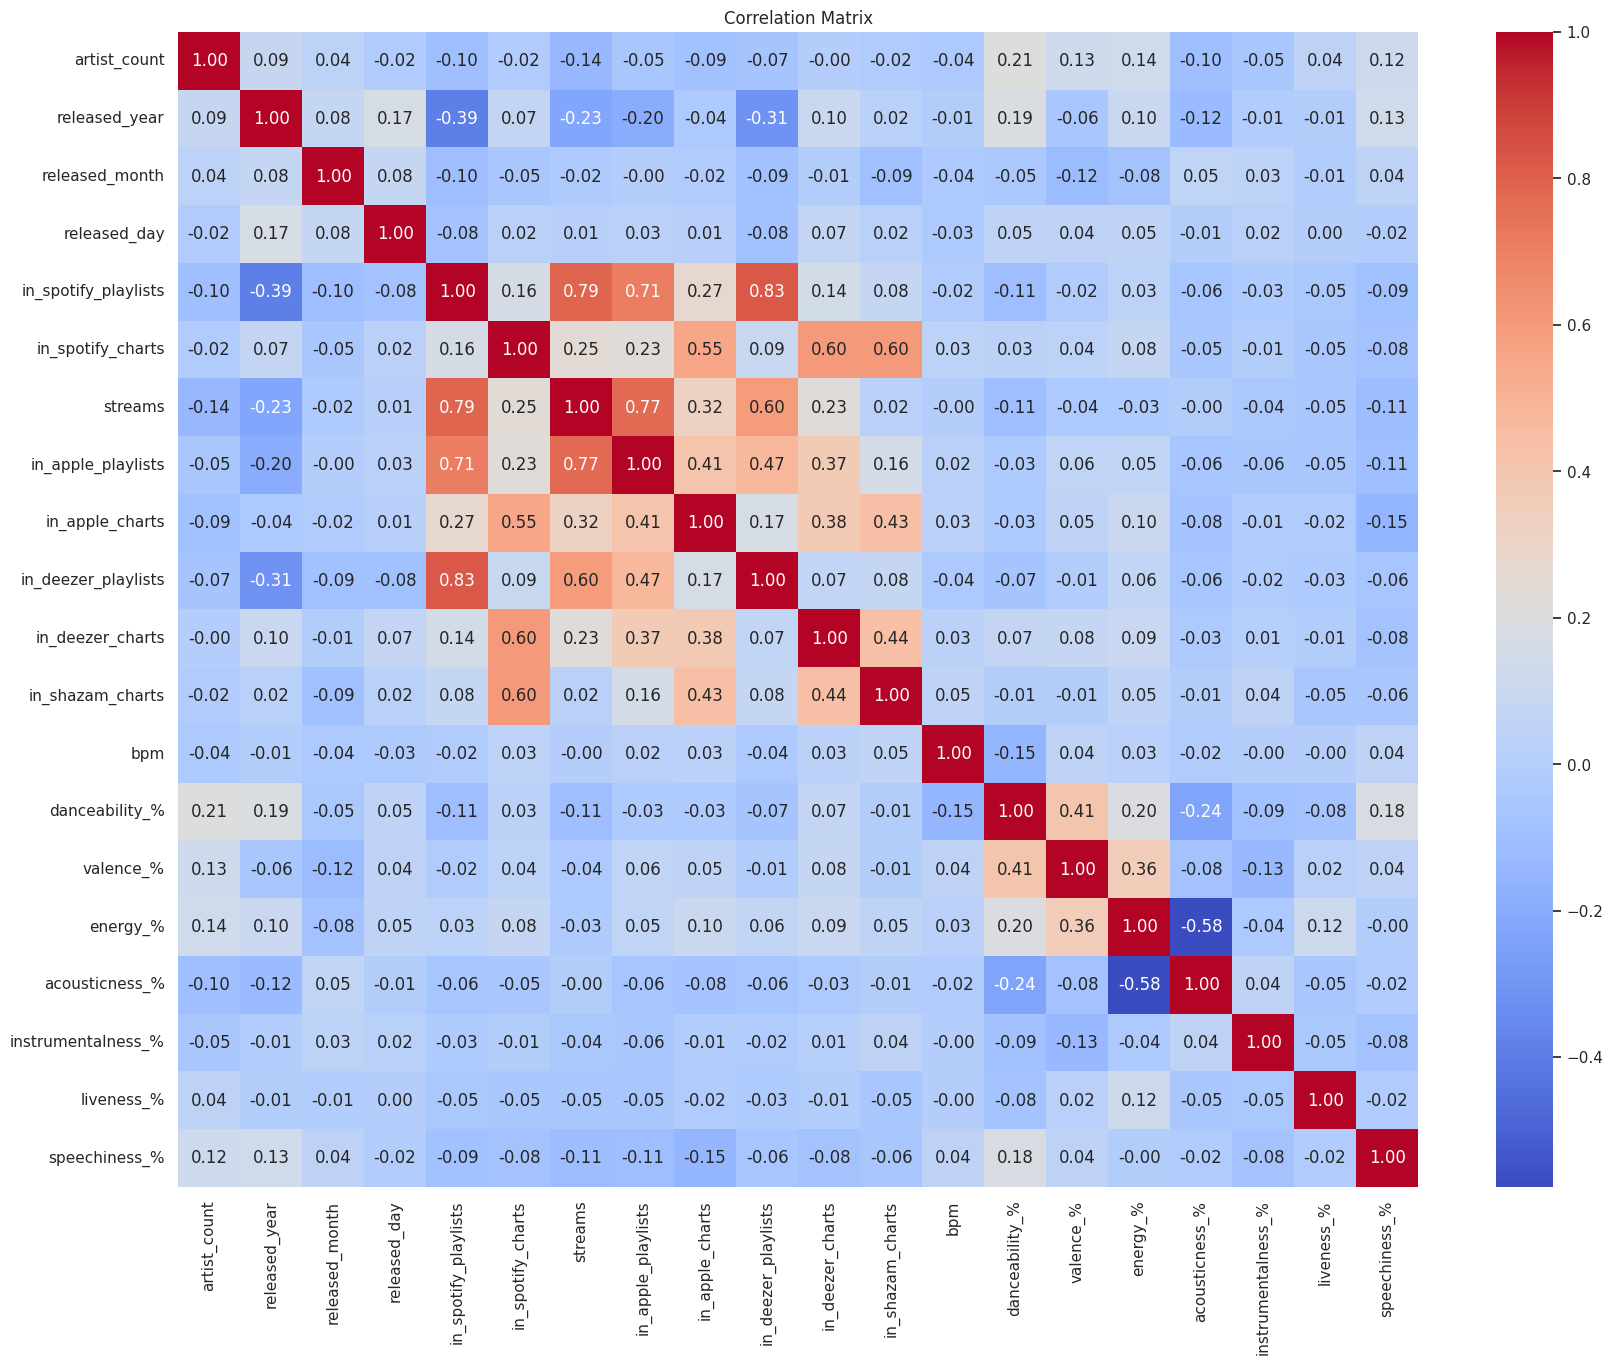

In [26]:
numerical_attributes = df[df.columns[df.dtypes != 'object']]
correlation_matrix = numerical_attributes.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

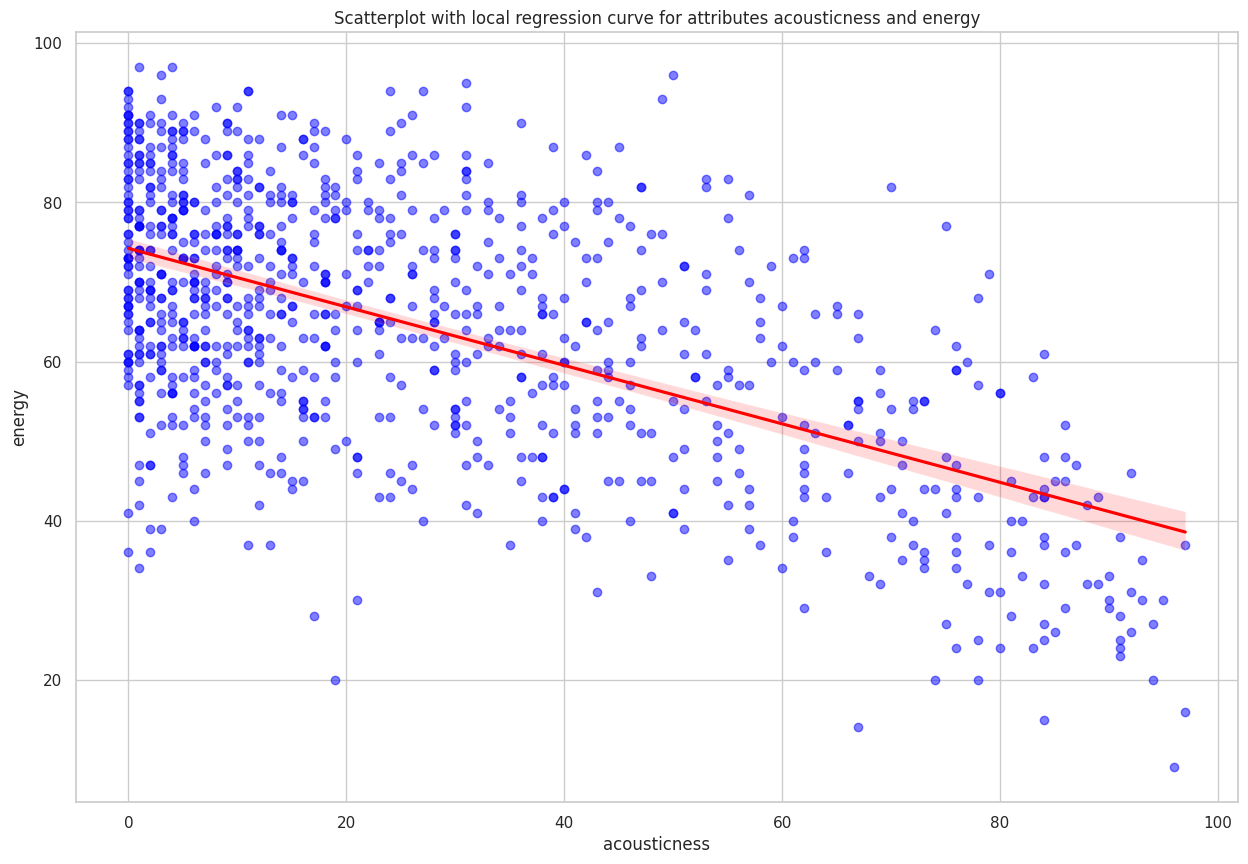

In [27]:
y_attribute = 'energy_%'
x_attribute = 'acousticness_%'

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatterplot with local regression curve for attributes acousticness and energy')
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.show()


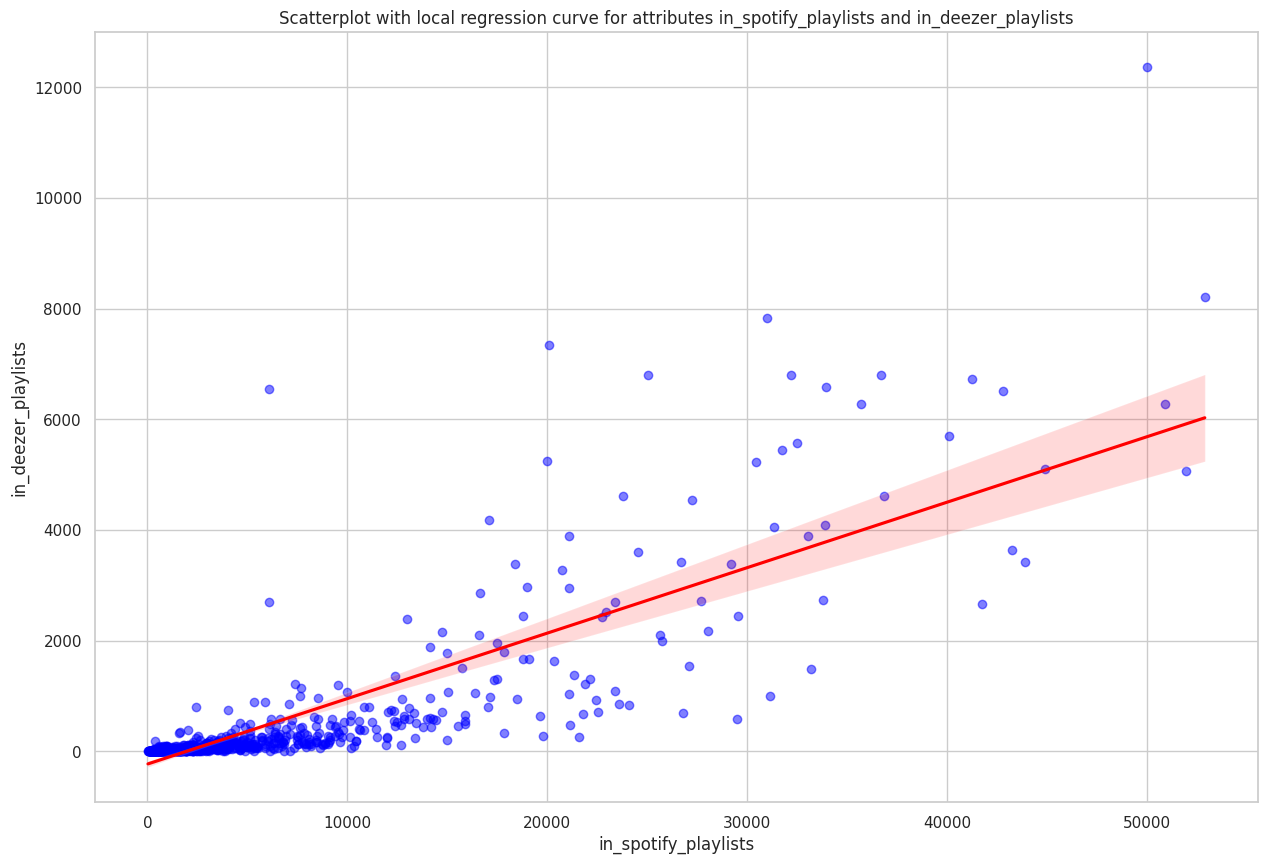

In [28]:
y_attribute = 'in_deezer_playlists'
x_attribute = 'in_spotify_playlists'

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatterplot with local regression curve for attributes in_spotify_playlists and in_deezer_playlists')
plt.xlabel('in_spotify_playlists')
plt.ylabel('in_deezer_playlists')
plt.show()

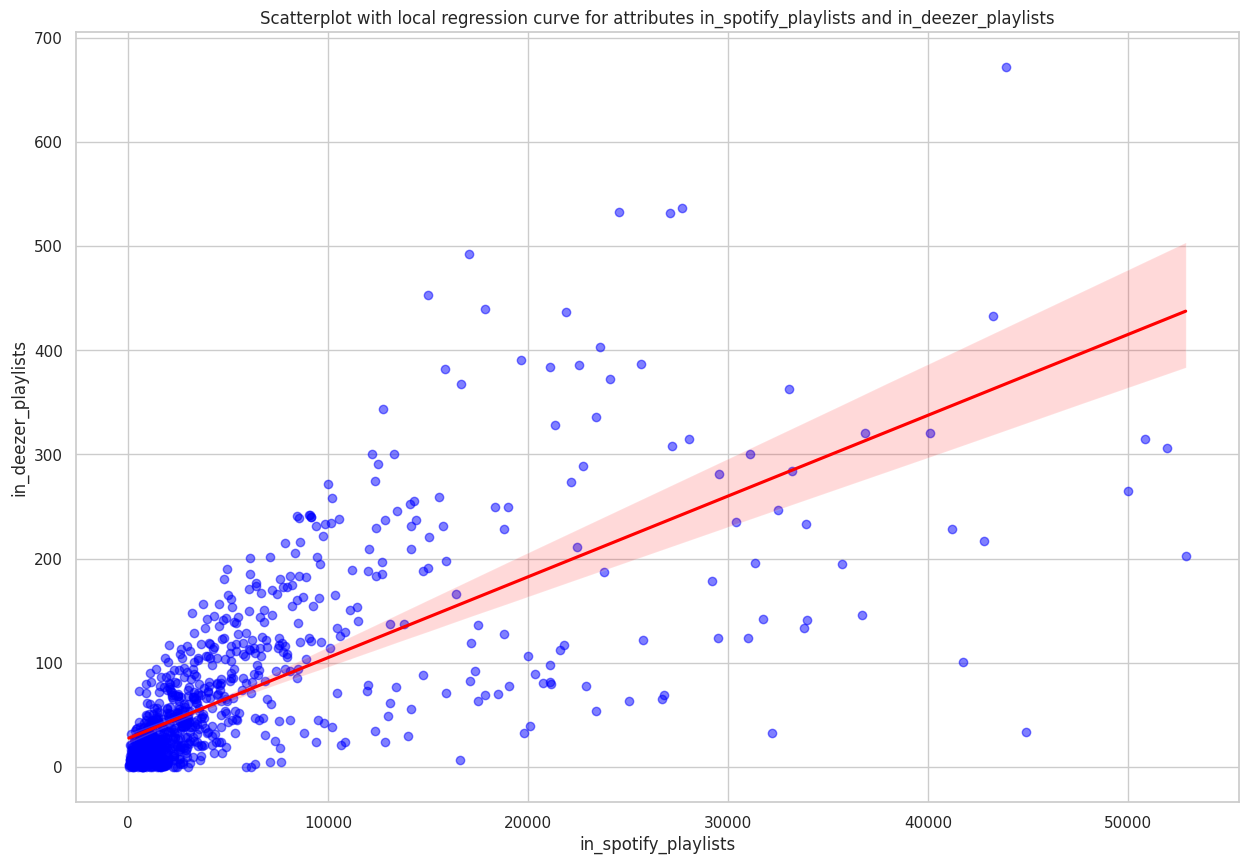

In [29]:
y_attribute = 'in_apple_playlists'
x_attribute = 'in_spotify_playlists'

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatterplot with local regression curve for attributes in_spotify_playlists and in_deezer_playlists')
plt.xlabel('in_spotify_playlists')
plt.ylabel('in_deezer_playlists')
plt.show()

## Příprava dolovací sady
### Zvolená varianta je: 
- Popularita pouze podle akustiky 


Pro popularitu založenou pouze na akustice písničky můžeme odstranit všechny atributy, které nemají nic společného s rytmem písničky.

In [30]:
acoustics_not_needed = df.columns[~df.columns.isin(['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams', 'in_shazam_charts'])].tolist()
acoustics_df = df.drop(acoustics_not_needed, axis=1)
acoustics_df

streams  in_shazam_charts  bpm key   mode  danceability_%  valence_%  \
0   141381703               826  125   B  Major              80         89   
1   133716286               382   92  C#  Major              71         61   
2   140003974               949  138   F  Major              51         32   
3   800840817               548  170   A  Major              55         58   
4   303236322               425  144   A  Minor              65         23   
..        ...               ...  ...  ..    ...             ...        ...   
948  91473363                 0  144   A  Major              60         24   
949 121871870                 0  166  F#  Major              42          7   
950  73513683                 0   92  C#  Major              80         81   
951 133895612                 0   97  C#  Major              82         67   
952  96007391                 0   90   E  Minor              61         32   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0          83              31                   0           8              4  
1          74               7                   0          10              4  
2          53              17                   0          31              6  
3          72              11                   0          11             15  
4          80              14                  63          11              6  
..        ...             ...                 ...         ...            ...  
948        39              57                   0           8              3  
949        24              83                   1          12              6  
950        67               4                   0           8              6  
951        77               8                   0          12              5  
952        67              15                   0          11              5  

[953 rows x 12 columns]

## Vypořádejte se s chybějícími hodnotami

### Predikční model pro `key`

In [31]:
# predikční model pro key
def fill_empty_key(df):
    df_train = df.dropna(subset=['key'])

    # Definujeme vlastnosti (X) a cílovou proměnnou (y)
    features = ['bpm', 'mode']
    target = 'key'

    X = df_train[features]
    y = df_train[target]

    # Převedeme 'mode' na numerické hodnoty pomocí one-hot encoding
    # Vytvoříme sloupcový transformátor, který aplikuje různé předzpracování na různé sloupce
    preprocessor = ColumnTransformer(
        transformers=[
            ('mode', OneHotEncoder(drop='first'), ['mode'])
        ],
        remainder='passthrough'
    )

    X = preprocessor.fit_transform(X)

    # Převedeme 'key' na numerické hodnoty pomocí label encoding
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Rozdělíme data na trénovací a testovací sady
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vytvoříme regresní model
    model = RandomForestRegressor()

    # Trénování modelu
    model.fit(X_train, y_train)

    # Vytvoříme nový DataFrame s řádky, kde chybí 'key'
    df_missing_key = df[df['key'].isnull()]

    # Použijeme natrénovaný model k predikci 'key' hodnot pro chybějící řádky
    try:
        X_missing = df_missing_key[features]
        X_missing = preprocessor.transform(X_missing)
        predicted_keys = model.predict(X_missing)

        # Převedeme predikované 'key' hodnoty zpět na původní hodnoty
        predicted_keys_labels = label_encoder.inverse_transform(predicted_keys.astype(int))

        # Přidáme chybějící hodnoty do původního datasetu
        df.loc[df['key'].isnull(), 'key'] = predicted_keys_labels
    except:
        pass
    df.isna().sum()


Doplnění hodnot `key` pro **popularitu podle akustiky**

In [32]:
fill_empty_key(acoustics_df)
acoustics_df.isna().sum(), acoustics_df.shape

(streams                1
 in_shazam_charts      50
 bpm                    0
 key                    0
 mode                   0
 danceability_%         0
 valence_%              0
 energy_%               0
 acousticness_%         0
 instrumentalness_%     0
 liveness_%             0
 speechiness_%          0
 dtype: int64,
 (953, 12))

Odstranění hodnot `in_shazam_charts` pro **popularitu podle akustiky**

In [33]:
acoustics_df = acoustics_df.dropna(subset=['in_shazam_charts'])
acoustics_df.isna().sum(), acoustics_df.shape

(streams               1
 in_shazam_charts      0
 bpm                   0
 key                   0
 mode                  0
 danceability_%        0
 valence_%             0
 energy_%              0
 acousticness_%        0
 instrumentalness_%    0
 liveness_%            0
 speechiness_%         0
 dtype: int64,
 (903, 12))

### Vypořádání se s odlehlými hodnotami

In [34]:
datasets = [acoustics_df]
for i in datasets:
    zero_streams = i['streams'].isna()
    rows_with_weird_values = i[zero_streams]

    try:
        row_track_3 = rows_with_weird_values.iloc[0]

        i.loc[row_track_3.name, 'streams'] = 214268292
    except:
        pass
    
    

    print(i.isna().sum(), '\n')
    

streams               0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64 



Kdybychom na dolování používali název písničky, takto bychom doplnili chybějící názvy

In [35]:
fill_empty_key(df)

empty_track_name_new = df['track_name'] == ''
zero_streams = df['streams'].isna()

rows_with_weird_values = df[empty_track_name_new | zero_streams]

try:
    row_track_1 = rows_with_weird_values.iloc[0]
    row_track_2 = rows_with_weird_values.iloc[1]
    row_track_3 = rows_with_weird_values.iloc[2]

    df.loc[row_track_1.name, 'track_name'] = 'アイドル'
    df.loc[row_track_2.name, 'track_name'] = 'Shinunoga E-Wa'
    df.loc[row_track_3.name, 'streams'] = 214268292
    the_creator_rows = df[df['artist(s)_name'].str.contains('The Creator')]

    for idx, row in the_creator_rows.iterrows():
        df.loc[idx, 'artist_count'] -= 1
except:
    pass
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Diskretizace numerických atributů

Toto by se hodilo pro datovou sadu pro **popularitu podle akustiky**

In [36]:
attributes_to_discretize = acoustics_df[acoustics_df.columns[acoustics_df.dtypes != 'object']]

acoustics_df_num = acoustics_df.copy()

# Určete počet kategorií
num_bins = 5

bin_edges_dict = {}

# Diskretizace pomocí KBinsDiscretizer
for attribute in attributes_to_discretize:
    discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform', subsample=None)
    acoustics_df_num[attribute+'_category'] = discretizer.fit_transform(acoustics_df_num[attribute].values.reshape(-1, 1))
    
    bin_edges_dict[attribute+'_category'] = discretizer.bin_edges_[0]
    
# Odstraníme původní numerické atributy
acoustics_df_num.drop(attributes_to_discretize, axis=1, inplace=True)

with open ('file.txt', 'w') as file:
    for attribute, bin_edges in bin_edges_dict.items():
        print(f"{attribute} ranges:", file=file)
        for i in range(len(bin_edges) - 1):
            print(f"  {i}. {bin_edges[i]:.2f} to {bin_edges[i + 1]:.2f}", file=file)

acoustics_df_num

key   mode  streams_category  in_shazam_charts_category  bpm_category  \
0     B  Major                 0                          2             2   
1    C#  Major                 0                          1             0   
2     F  Major                 0                          3             2   
3     A  Major                 1                          1             3   
4     A  Minor                 0                          1             2   
..   ..    ...               ...                        ...           ...   
948   A  Major                 0                          0             2   
949  F#  Major                 0                          0             3   
950  C#  Major                 0                          0             0   
951  C#  Major                 0                          0             1   
952   E  Minor                 0                          0             0   

     danceability_%_category  valence_%_category  energy_%_category  \
0                          3                   4                  4   
1                          3                   3                  3   
2                          1                   1                  2   
3                          2                   2                  3   
4                          2                   1                  4   
..                       ...                 ...                ...   
948                        2                   1                  1   
949                        1                   0                  0   
950                        3                   4                  3   
951                        4                   3                  3   
952                        2                   1                  3   

     acousticness_%_category  instrumentalness_%_category  \
0                          1                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            3   
..                       ...                          ...   
948                        2                            0   
949                        4                            0   
950                        0                            0   
951                        0                            0   
952                        0                            0   

     liveness_%_category  speechiness_%_category  
0                      0                       0  
1                      0                       0  
2                      1                       0  
3                      0                       1  
4                      0                       0  
..                   ...                     ...  
948                    0                       0  
949                    0                       0  
950                    0                       0  
951                    0                       0  
952                    0                       0  

[903 rows x 12 columns]

### Transformace kategorických atributů na numerické atributy

Zde by se naopak hodila datová sada pro **popularitu podle umělce**

In [37]:
key_map = {'A': 0, 'A#': 1, 'B': 2, 'C#': 3, 'D': 4, 'D#': 5, 'E': 6, 'F': 7, 'F#': 8, 'G': 9, 'G#': 10}

mode_map = {'Minor': 0, 'Major': 1}

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)

acoustics_df.loc[:, 'key'] = acoustics_df['key'].map(key_map)
acoustics_df.loc[:, 'mode'] = acoustics_df['mode'].map(mode_map)

numerical_columns = ['streams', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

scaler = MinMaxScaler()
acoustics_df.loc[:, numerical_columns] = scaler.fit_transform(acoustics_df[numerical_columns])

acoustics_df

streams  in_shazam_charts  bpm key mode  danceability_%  valence_%  \
0       0.04              0.57 0.43   2    1            0.78       0.91   
1       0.04              0.26 0.19   3    1            0.66       0.61   
2       0.04              0.65 0.52   7    1            0.38       0.30   
3       0.22              0.38 0.74   0    1            0.44       0.58   
4       0.09              0.29 0.56   0    0            0.58       0.20   
..       ...               ...  ...  ..  ...             ...        ...   
948     0.03              0.00 0.56   0    1            0.51       0.22   
949     0.03              0.00 0.72   8    1            0.26       0.03   
950     0.02              0.00 0.19   3    1            0.78       0.83   
951     0.04              0.00 0.23   3    1            0.81       0.68   
952     0.03              0.00 0.18   6    0            0.52       0.30   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0        0.84            0.32                0.00        0.05           0.03  
1        0.74            0.07                0.00        0.07           0.03  
2        0.50            0.18                0.00        0.30           0.06  
3        0.72            0.11                0.00        0.09           0.21  
4        0.81            0.14                0.69        0.09           0.06  
..        ...             ...                 ...         ...            ...  
948      0.34            0.59                0.00        0.05           0.02  
949      0.17            0.86                0.01        0.10           0.06  
950      0.66            0.04                0.00        0.05           0.06  
951      0.77            0.08                0.00        0.10           0.05  
952      0.66            0.15                0.00        0.09           0.05  

[903 rows x 12 columns]

In [39]:
acoustics_df.head(50).to_csv('acoustics_df_transformed' + '.csv', index=False)
acoustics_df_num.head(50).to_csv('acoustics_df_num' + '.csv', index=False)